<a href="https://colab.research.google.com/github/NathanAugusth/Algoritmos-e-Complexidade/blob/main/03_Login.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install playwright
!playwright install
!playwright install-deps

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 MB 18.4 MB/s eta 0:00:00
173.7 MiB [] 0% 0.0s173.7 MiB [] 0% 20.8s173.7 MiB [] 0% 12.9s173.7 MiB [] 0% 7.7s173.7 MiB [] 1% 4.7s173.7 MiB [] 2% 3.9s173.7 MiB [] 3% 3.2s173.7 MiB [] 3% 2.8s173.7 MiB [] 4% 2.6s173.7 MiB [] 5% 2.7s173.7 MiB [] 5% 2.6s173.7 MiB [] 6% 2.6s173.7 MiB [] 7% 2.4s173.7 MiB [] 8% 2.3s173.7 MiB [] 9% 2.3s173.7 MiB [] 10% 2.2s173.7 MiB [] 11% 2.1s173.7 MiB [] 12% 2.0s173.7 MiB [] 13% 1.9s173.7 MiB [] 14% 1.9s173.7 MiB [] 15% 1.9s173.7 MiB [] 16% 1.9s173.7 MiB [] 17% 1.8s173.7 MiB [] 18% 1.7s173.7 MiB [] 19% 1.7s173.7 MiB [] 20% 1.6s173.7 MiB [] 21% 1.7s173.7 MiB [] 22% 1.6s173.7 MiB [] 24% 1.5s173.7 MiB [] 25% 1.5s173.7 MiB [] 27% 1.4s173.7 MiB [] 28% 1.3s173.7 MiB [] 29% 1.3s173.7 MiB [] 31% 1.3s173.7 MiB [] 32% 1.2s173.7 MiB [] 34% 1.2s173.7 MiB [] 35% 1.1s173.7 MiB [] 37% 1.1s173.7 MiB [] 38% 1.0s173.7 MiB [] 40% 1.0s173.7 MiB [] 41% 0.9s173.7 MiB [] 43% 0.9s173.7 MiB [] 45% 0.9s173.7 MiB [] 46% 0.8s173.7 MiB 

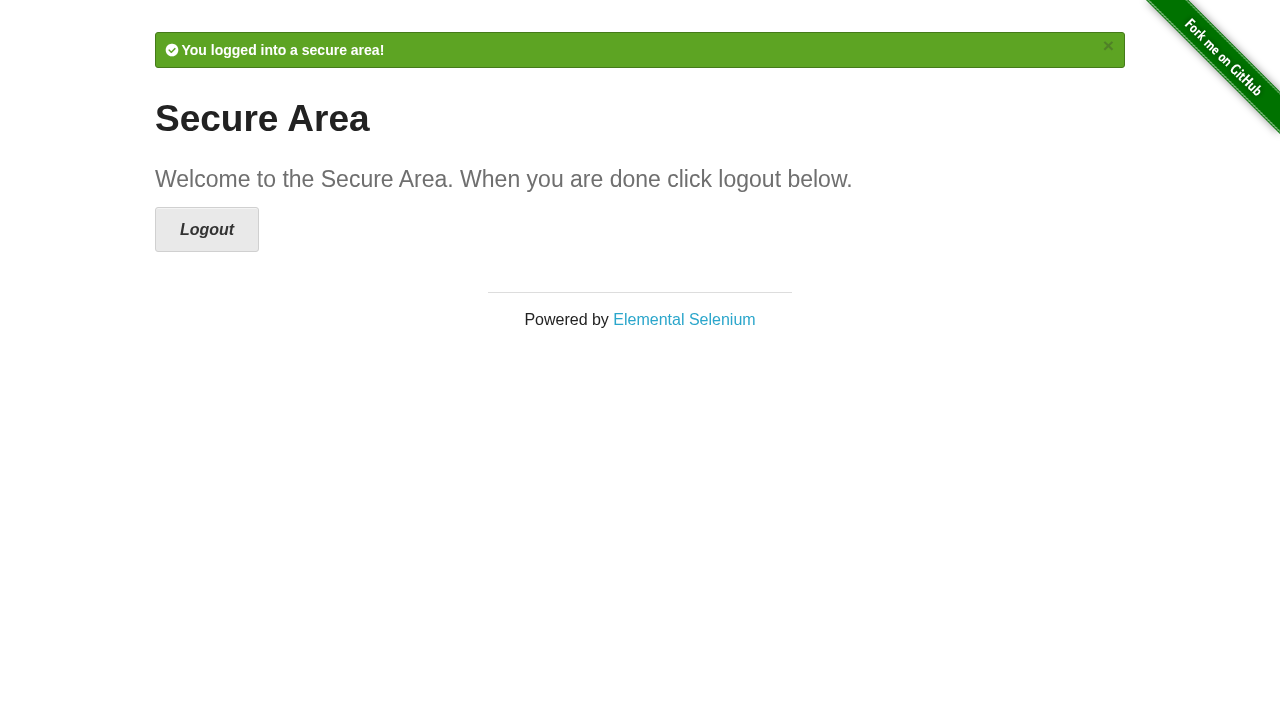

In [2]:
import asyncio
from playwright.async_api import async_playwright
from IPython.display import Image, display

async def main():
    async with async_playwright() as p:  # Inicializa o Playwright
        browser = await p.chromium.launch(headless=True)
        page = await browser.new_page()

        await page.goto("https://the-internet.herokuapp.com/login")

        await page.fill('input[name="username"]', "tomsmith")
        await page.fill('input[name="password"]', "SuperSecretPassword!")
        await page.click('button[type="submit"]')

        await page.wait_for_selector('div#flash.success')

        success_message = await page.locator('div#flash.success').inner_text()  # Extrai o texto da mensagem de sucesso.
        assert "You logged into a secure area!" in success_message, "Login failed: Success message not found"  # Verifica se o login foi bem-sucedido.

        screenshot_bytes = await page.screenshot()  # Captura uma imagem da página.
        display(Image(data=screenshot_bytes))

        await browser.close()

if __name__ == "__main__":
    await main()